<a href="https://colab.research.google.com/github/aidulfitri/WesataOne-ML/blob/main/recommendation%20system%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import tabulate
import os

In [ ]:
os.environ['KAGGLE_USERNAME'] = 'nabilambangkit'
os.environ['KAGGLE_KEY'] = '3424b51719aff67d21ab4d54441ffa15'

In [ ]:
!kaggle datasets download -d aprabowo/indonesia-tourism-destination -f tourism_with_id.csv -p .
!kaggle datasets download -d aprabowo/indonesia-tourism-destination -f tourism_rating.csv -p .

Dataset URL: https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination
License(s): copyright-authors
  0% 0.00/357k [00:00<?, ?B/s]
100% 357k/357k [00:00<00:00, 7.87MB/s]
Dataset URL: https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination
License(s): copyright-authors
  0% 0.00/102k [00:00<?, ?B/s]
100% 102k/102k [00:00<00:00, 4.18MB/s]


In [2]:
tourism_df = pd.read_csv('/content/tourism_with_id_2.csv')
rating_df = pd.read_csv('/content/tourism_rating_2.csv')

In [3]:
data_place = tourism_df[["Place_Id", "Place_Name", "Category", "Rating"]]
rating_df = rating_df[["User_Id",	"Place_Id", "Place_Ratings"]]

In [4]:
num_cat = len(data_place["Category"].unique())
num_user = len(rating_df["User_Id"].unique())

In [5]:
def gen_user_vecs(user_vecs, num):
  vec = []

  for i in range(num):
    vec.append(user_vecs)

  return np.array(vec)

In [6]:
place_prep = rating_df.copy()
place_prep = place_prep.drop("User_Id", axis=1)
place_prep = place_prep.groupby(['Place_Id']).count()
place_prep = place_prep.reset_index()


place_rating = {'Place_Id': data_place["Place_Id"].unique()}
place_rating = pd.DataFrame(place_rating)
cols_name = data_place["Category"].unique()

for i in range(num_cat):
  place_rating.insert(i+1, cols_name[i], np.zeros(len(data_place["Place_Id"].unique())), True)

for i in range(len(data_place)):
  place_rating[data_place["Category"][i]][i] = 1

place_rating.insert(7, "Rating", data_place["Rating"], True)
place_rating.insert(8, "Rating_Count", place_prep["Place_Ratings"], True)

place_rating


<ipython-input-6-dfe095d1d90a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  place_rating[data_place["Category"][i]][i] = 1
<ipython-input-6-dfe095d1d90a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  place_rating[data_place["Category"][i]][i] = 1
<ipython-input-6-dfe095d1d90a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  place_rating[data_place["Category"][i]][i] = 1
<ipython-input-6-dfe095d1d90a>:15: SettingWithCopyWarni

,Place_Id,Budaya,Taman Hiburan,Cagar Alam,Bahari,Pusat Perbelanjaan,Tempat Ibadah,Rating,Rating_Count
0,1,1.0,0.0,0.0,0.0,0.0,0.0,4.6,500
1,2,1.0,0.0,0.0,0.0,0.0,0.0,4.6,289
2,3,0.0,1.0,0.0,0.0,0.0,0.0,4.6,500
3,4,0.0,1.0,0.0,0.0,0.0,0.0,4.5,500
4,5,0.0,1.0,0.0,0.0,0.0,0.0,4.5,92
...,...,...,...,...,...,...,...,...,...
432,433,1.0,0.0,0.0,0.0,0.0,0.0,4.4,33
433,434,0.0,1.0,0.0,0.0,0.0,0.0,4.6,500
434,435,0.0,1.0,0.0,0.0,0.0,0.0,4.4,51
435,436,0.0,1.0,0.0,0.0,0.0,0.0,4.7,84


In [7]:
user_prep = pd.merge(rating_df, data_place)
user_prep = user_prep.drop(["Rating", "Place_Id"], axis=1)
user_prep = user_prep.groupby(['User_Id', 'Category']).sum()  # Apply an aggregation (e.g., mean)
user_prep.reset_index()

,User_Id,Category,Place_Ratings,Place_Name
0,1,Bahari,14,Pantai MarinaPantai SepanjangPantai Timang
1,1,Budaya,28,Gedung SateMonumen NasionalTebing BreksiMuseum...
2,1,Cagar Alam,36,Gembira Loka ZooKebun Binatang RagunanCurug Ci...
3,1,Pusat Perbelanjaan,9,Mall Thamrin CityPecinan Glodok
4,1,Taman Hiburan,61,Alun Alun Selatan YogyakartaTugu Pal Putih Jog...
...,...,...,...,...
5429,1000,Budaya,17,Tebing BreksiKeraton YogyakartaMuseum Kereta A...
5430,1000,Cagar Alam,35,Gembira Loka ZooBukit MokoBunker Kaliadem Mera...
5431,1000,Pusat Perbelanjaan,14,Mall Thamrin CityPasar BeringharjoFood Junctio...
5432,1000,Taman Hiburan,83,Orchid Forest CikoleJogja Bay Pirates Adventur...


In [8]:
user_prep = pd.merge(rating_df, data_place)
user_prep = user_prep.drop(["Rating", "Place_Id"], axis=1)
user_prep = user_prep.groupby(['User_Id', 'Category']).sum()
user_prep = user_prep.reset_index()

user_rating = {'User_Id': rating_df["User_Id"].unique()}
user_rating = pd.DataFrame(user_rating)
col_name = data_place["Category"].unique()

for i in range(num_cat):
  user_rating.insert(i+1, col_name[i], np.array([3.0]*num_user), True)

for i in range(len(user_prep)):
  user_rating[user_prep["Category"][i]][user_prep["User_Id"][i]-1] = user_prep["Place_Ratings"][i].copy()

user_rating

Output streaming akan dipotong hingga 5000 baris terakhir.
<ipython-input-8-a21f016dbab2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_rating[user_prep["Category"][i]][user_prep["User_Id"][i]-1] = user_prep["Place_Ratings"][i].copy()
<ipython-input-8-a21f016dbab2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_rating[user_prep["Category"][i]][user_prep["User_Id"][i]-1] = user_prep["Place_Ratings"][i].copy()
<ipython-input-8-a21f016dbab2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

,User_Id,Budaya,Taman Hiburan,Cagar Alam,Bahari,Pusat Perbelanjaan,Tempat Ibadah
0,1,28.0,61.0,36.0,14.0,9.0,3.0
1,2,33.0,76.0,24.0,4.0,3.0,3.0
2,3,38.0,66.0,18.0,3.0,10.0,3.0
3,4,46.0,64.0,10.0,4.0,14.0,3.0
4,5,38.0,44.0,48.0,3.0,3.0,10.0
...,...,...,...,...,...,...,...
995,996,36.0,28.0,27.0,13.0,9.0,20.0
996,997,51.0,64.0,23.0,14.0,9.0,3.0
997,998,46.0,72.0,17.0,5.0,4.0,3.0
998,999,38.0,37.0,34.0,3.0,10.0,5.0


In [9]:
place_ratings = rating_df.merge(place_rating, how="left", on="Place_Id")
place_ratings = place_ratings.drop(["User_Id", "Place_Id", "Place_Ratings"], axis=1)

user_ratings = rating_df.merge(user_rating, how="left", on="User_Id")
user_ratings = user_ratings.drop(["User_Id", "Place_Id", "Place_Ratings"], axis=1)

y = np.array(rating_df["Place_Ratings"])


In [10]:
# Place
place_train = place_ratings.copy()
place_train["Rating"] = (place_train["Rating"]-3)/2
place_train["Rating_Count"] = (place_train["Rating_Count"])/50

# User
user_train = user_ratings.copy()
user_train = (user_train-3)/2


# Target
y_train = y.copy()
y_train = (y_train-3)/2


In [11]:
place_train, place_test = train_test_split(place_train, train_size=0.80, shuffle=True, random_state=1)
user_train, user_test = train_test_split(user_train, train_size=0.80, shuffle=True, random_state=1)
y_train, y_test       = train_test_split(y_train,    train_size=0.80, shuffle=True, random_state=1)
print(f"place training data shape: {user_train.shape}")
print(f"place test data shape: {user_test.shape}")

place training data shape: (26244, 6)
place test data shape: (6561, 6)


In [12]:
num_outputs = 8



tf.random.set_seed(1)
user_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='linear'),
    tf.keras.layers.Dense(num_outputs, activation='linear')
])

item_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='linear'),
    tf.keras.layers.Dense(num_outputs, activation='linear')
])

# create the user input and point to the base network
input_user = tf.keras.layers.Input(shape=(num_cat))
vu = user_NN(input_user)


# create the item input and point to the base network
input_item = tf.keras.layers.Input(shape=(num_cat+2))
vm = item_NN(input_item)



# compute the dot product of the two vectors vu and vm
output = tf.keras.layers.Dot(axes=1)([vu, vm])

# specify the inputs and output of the model
model = tf.keras.Model([input_user, input_item], output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 sequential (Sequential)     (None, 8)                    248       ['input_1[0][0]']             
                                                                                                  
 sequential_1 (Sequential)   (None, 8)                    280       ['input_2[0][0]']             
                                                                                              

In [13]:

tf.random.set_seed(1)
cost_fn = tf.keras.losses.MeanSquaredError()
opt = keras.optimizers.Adam()
model.compile(optimizer=opt,
              loss=cost_fn,
              metrics=[tf.keras.metrics.CosineSimilarity(axis=1)]
              )
history = model.fit([user_train, place_train], y_train, validation_split=0.2, epochs=20)

Epoch 1/20
657/657 [==============================] - 3s 3ms/step - loss: 99.1764 - cosine_similarity: 0.0420 - val_loss: 4.3994 - val_cosine_similarity: 0.3113
Epoch 2/20
657/657 [==============================] - 2s 2ms/step - loss: 1.5608 - cosine_similarity: 0.5256 - val_loss: 0.6292 - val_cosine_similarity: 0.7251
Epoch 3/20
657/657 [==============================] - 2s 2ms/step - loss: 0.5162 - cosine_similarity: 0.7509 - val_loss: 0.4652 - val_cosine_similarity: 0.7784
Epoch 4/20
657/657 [==============================] - 1s 2ms/step - loss: 0.4012 - cosine_similarity: 0.8065 - val_loss: 0.3698 - val_cosine_similarity: 0.8036
Epoch 5/20
657/657 [==============================] - 1s 2ms/step - loss: 0.3254 - cosine_similarity: 0.8439 - val_loss: 0.3047 - val_cosine_similarity: 0.8451
Epoch 6/20
657/657 [==============================] - 2s 3ms/step - loss: 0.2707 - cosine_similarity: 0.8713 - val_loss: 0.2583 - val_cosine_similarity: 0.8665
Epoch 7/20
657/657 [===================

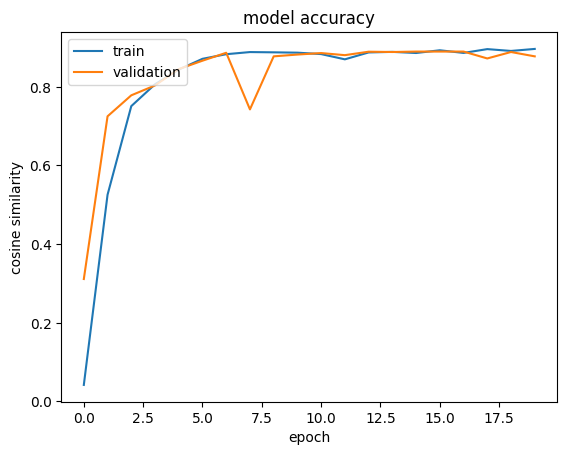

In [14]:
plt.plot(history.history['cosine_similarity'])
plt.plot(history.history['val_cosine_similarity'])
plt.title('model accuracy')
plt.ylabel('cosine similarity')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


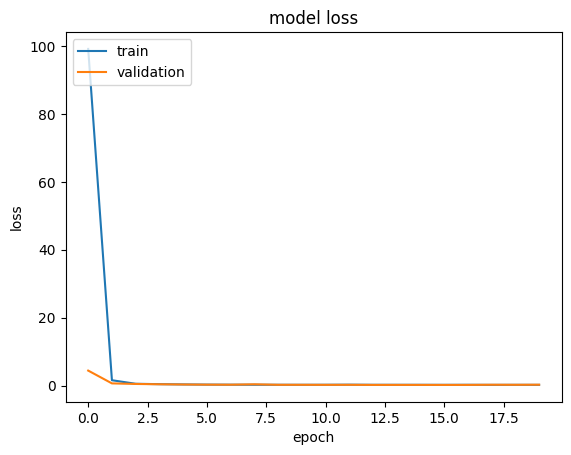

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [16]:
model.evaluate([user_test, place_test], y_test)

206/206 [==============================] - 0s 2ms/step - loss: 0.2379 - cosine_similarity: 0.8868


[0.23789197206497192, 0.8867549896240234]

In [17]:
rate_Budaya = 5
rate_Taman_Hiburan = 3
rate_Cagar_Alam = 3
rate_Bahari = 3
rate_Pusat_Perbelanjaan	= 3
rate_Tempat_Ibadah = 3

user_vec = [rate_Budaya, rate_Taman_Hiburan, rate_Cagar_Alam,
                      rate_Bahari, rate_Pusat_Perbelanjaan, rate_Tempat_Ibadah]

# generate and replicate the user vector to match the number movies in the data set.
user_vecs = np.array(gen_user_vecs(user_vec,len(place_rating)))
item_vecs = place_rating.drop("Place_Id", axis=1).copy()



# scale our user and item vectors
suser_vecs = (user_vecs-3)/2
sitem_vecs = item_vecs.copy()
sitem_vecs["Rating"] = (sitem_vecs["Rating"]-3)/2
sitem_vecs["Rating_Count"] = (sitem_vecs["Rating_Count"])/50

# make a prediction
y_p = model.predict([suser_vecs, sitem_vecs])

# unscale y prediction
y_pu = y_p*2+3
sorted_index = np.argsort((-y_pu),axis=0).reshape(-1).tolist() #negate to get largest rating first
sorted_ypu   = y_pu[sorted_index]
sorted_items = data_place.copy()
sorted_items = sorted_items.loc[sorted_index,:]  #using unscaled vectors for display
sorted_items.insert(4, "yp", sorted_ypu.flatten())
sorted_items.set_index("Place_Id").head(20)

14/14 [==============================] - 0s 2ms/step


,Place_Name,Category,Rating,yp
Place_Id,,,,
121,Candi Prambanan,Budaya,4.7,4.562337
338,Lawang Sewu,Budaya,4.6,4.549908
1,Monumen Nasional,Budaya,4.6,4.549908
104,Tebing Breksi,Budaya,4.4,4.525048
174,Pasar Beringharjo,Pusat Perbelanjaan,4.5,4.464776
7,Kebun Binatang Ragunan,Cagar Alam,4.5,4.383855
80,Plaza Indonesia,Pusat Perbelanjaan,4.7,4.353823
408,Kebun Binatang Surabaya,Cagar Alam,4.4,4.278056
434,Taman Bungkul,Taman Hiburan,4.6,4.177947


In [18]:
"""Predictions for Hidden Gems"""


# sort the results, highest prediction first
sorted_gems = data_place.copy()
sorted_gems = sorted_gems.loc[sorted_index,:]  #using unscaled vectors for display
sorted_gems.insert(4, "yp", sorted_ypu.flatten())
sorted_gems.insert(4, "Rating_Count", place_prep.drop("Place_Id", axis=1))
sorted_gems = sorted_gems.loc[sorted_gems["Rating_Count"] <= 20]
sorted_gems = sorted_gems.loc[sorted_gems["Rating"] >= 4.5]
sorted_gems.set_index("Place_Id").head(20)

,Place_Name,Category,Rating,Rating_Count,yp
Place_Id,,,,,
437,Gereja Perawan Maria Tak Berdosa Surabaya,Tempat Ibadah,4.8,13,3.236841
280,Gereja Tiberias Indonesia Bandung,Tempat Ibadah,5.0,1,3.227747
303,Masjid Al-Imtizaj,Tempat Ibadah,4.7,12,3.221582
380,Masjid Agung Ungaran,Tempat Ibadah,4.7,6,3.204606
49,Galeri Indonesia Kaya,Budaya,4.8,14,3.199682
348,Pura Giri Natha,Budaya,4.8,12,3.194023
171,Candi Ijo,Budaya,4.8,11,3.191193
65,Museum Basoeki Abdullah,Budaya,4.7,13,3.184423
59,Museum Sumpah Pemuda,Budaya,4.7,12,3.181593
